Initial class distribution:
Working Professional or Student
Working Professional    112799
Student                  27901
Name: count, dtype: int64
Depression
0    115133
1     25567
Name: count, dtype: int64
Class distribution after undersampling:
Working Professional or Student
Working Professional    46363
Student                 27901
Name: count, dtype: int64
Depression
0    48697
1    25567
Name: count, dtype: int64


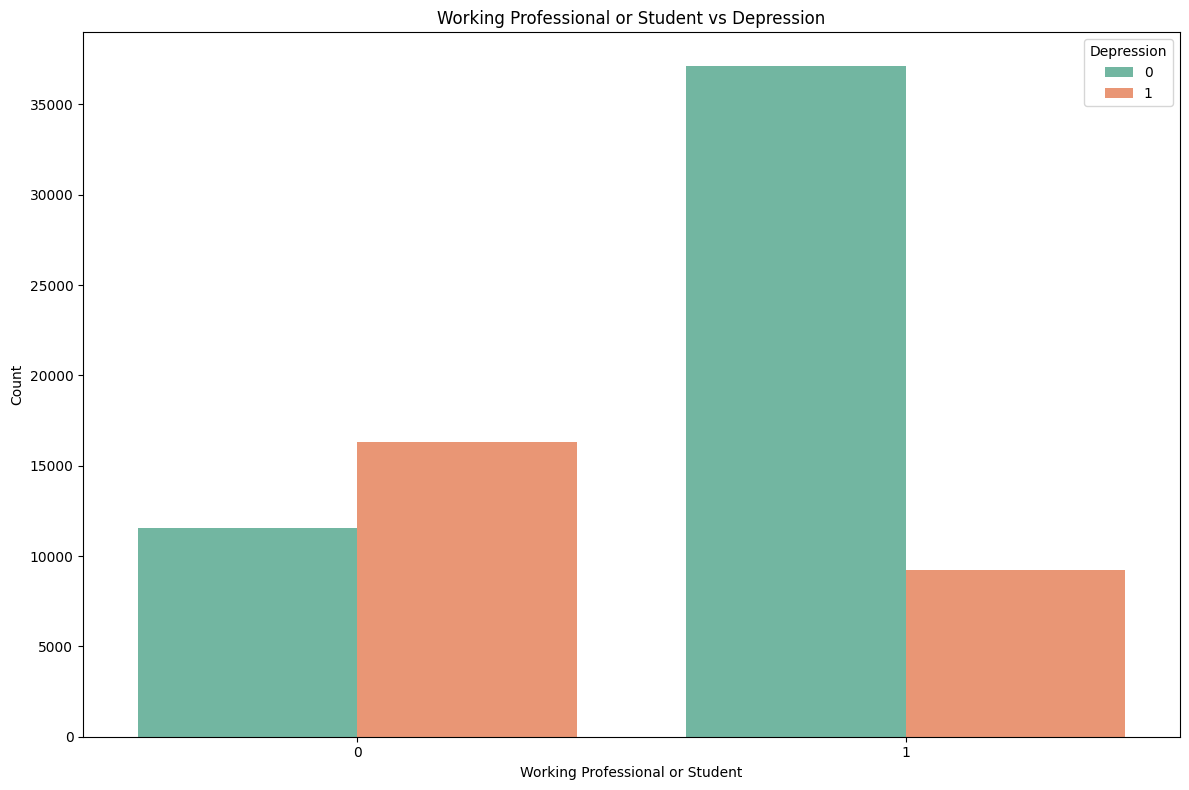

In [48]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('../data/external/train.csv')

data = data.drop_duplicates()


##############################################################
########## Working Professional or Student Analysis ##########
##############################################################

# Display the initial class distribution
print("Initial class distribution:")
print(data['Working Professional or Student'].value_counts())
print(data['Depression'].value_counts())

# Identify majority and minority classes
majority_class = data[(data['Working Professional or Student'] == 'Working Professional') & (data['Depression'] == 0)]
minority_classes = data[(data['Working Professional or Student'] != 'Working Professional') | (data['Depression'] == 1)]

# Perform undersampling on the majority class
undersampled_majority_class = resample(majority_class,
                                       replace=False, # sample without replacement
                                       n_samples=len(minority_classes), # to match minority class
                                       random_state=42) # for reproducibility

# Combine minority classes with undersampled majority class
data = pd.concat([undersampled_majority_class, minority_classes])

# Shuffle the dataset to mix the classes
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify the class distribution after undersampling
print("Class distribution after undersampling:")
print(data['Working Professional or Student'].value_counts())
print(data['Depression'].value_counts())

data.to_csv('../data/processed/balanced_dataset.csv', index=False)

balanced_dataset = pd.read_csv("../data/processed/balanced_dataset.csv")

label_encoder = LabelEncoder()

balanced_dataset['Working_Professional_Student_LE'] = label_encoder.fit_transform(balanced_dataset['Working Professional or Student'])

# Display the encoded data
#print(balanced_dataset[['Working Professional or Student', 'Working_Professional_Label_Encoded']])

balanced_dataset = balanced_dataset.drop(columns=['Working Professional or Student'])

# Save the updated dataset
balanced_dataset.to_csv('../data/processed/balanced_dataset_LE.csv', index=False)

balanced_dataset_LE = pd.read_csv('../data/processed/balanced_dataset_LE.csv')

plt.figure(figsize=(12, 8))
sns.countplot(x='Working_Professional_Student_LE', hue='Depression', data=balanced_dataset_LE, palette='Set2')
plt.title('Working Professional or Student vs Depression')
plt.xlabel('Working Professional or Student')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Depression')
plt.tight_layout()
plt.savefig('../reports/figures/ash/working_prof_depression_balanced_undersampling.png')
plt.show()

Rows where both 'Job satisfaction' and 'Study satisfaction' have values:
37026    3.0
40957    2.0
Name: Job Satisfaction, dtype: float64 37026    3.0
40957    5.0
Name: Study Satisfaction, dtype: float64
Is it true that values missing in 'Job satisfaction' are present in 'Study satisfaction' and vice versa? Job satisfaction NA      False
Study satisfaction NA    False
dtype: bool


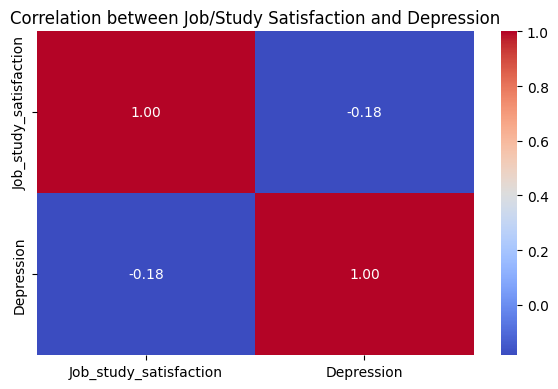

In [49]:


### Use balanced_dataset_LE = pd.read_csv("balanced_dataset_LE.csv") from here

###########################################################
##### Job Satisfaction and Study Satisfaction Analysis ####
###########################################################

# Find instances where both 'Job satisfaction' and 'Study satisfaction' have values
both_values_present = balanced_dataset_LE.dropna(subset=['Job Satisfaction', 'Study Satisfaction'])

print("Rows where both 'Job satisfaction' and 'Study satisfaction' have values:")
print(both_values_present['Job Satisfaction'], both_values_present['Study Satisfaction'])

# Check for missing values in both columns
job_satisfaction_na = balanced_dataset_LE['Job Satisfaction'].isna()
study_satisfaction_na = balanced_dataset_LE['Study Satisfaction'].isna()

# Create a DataFrame to show where the missing values are
missing_values_check = pd.DataFrame({
    'Job satisfaction NA': job_satisfaction_na,
    'Study satisfaction NA': study_satisfaction_na
})

# Check for rows where one column is missing and the other is not
missing_in_one_present_in_other = missing_values_check[(job_satisfaction_na & ~study_satisfaction_na) | (~job_satisfaction_na & study_satisfaction_na)]

is_true = missing_in_one_present_in_other.all()

print("Is it true that values missing in 'Job satisfaction' are present in 'Study satisfaction' and vice versa?", is_true)

# Create the new column by combining 'Job satisfaction' and 'Study satisfaction'
balanced_dataset_LE['Job_study_satisfaction'] = balanced_dataset_LE['Job Satisfaction'].fillna(balanced_dataset_LE['Study Satisfaction'])

# Drop the original columns
balanced_dataset_LE = balanced_dataset_LE.drop(columns=['Job Satisfaction', 'Study Satisfaction'])


corr_matrix3 = balanced_dataset_LE[['Job_study_satisfaction', 'Depression']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix3, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Job/Study Satisfaction and Depression')
plt.tight_layout()
plt.savefig('../reports/figures/ash/job_study_satisfaction_Depression_Correlation.png')
plt.show()


Rows where both 'Academic Pressure' and 'Work Pressure' have values:
Series([], Name: Academic Pressure, dtype: float64) Series([], Name: Work Pressure, dtype: float64)
Is it true that values missing in 'Academic Pressure' are present in 'Work Pressure' and vice versa? Academic Pressure NA    False
Work Pressure NA        False
dtype: bool


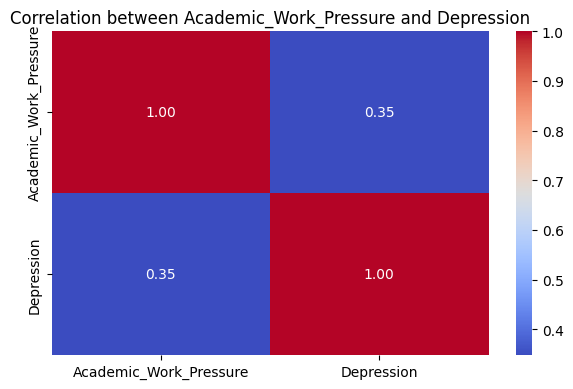

In [50]:




###########################################################
##### Work Pressure and Academic Pressure Analysis ########
###########################################################

# Find instances where both 'Job satisfaction' and 'Study satisfaction' have values
both_values_present = balanced_dataset_LE.dropna(subset=['Academic Pressure', 'Work Pressure'])

print("Rows where both 'Academic Pressure' and 'Work Pressure' have values:")
print(both_values_present['Academic Pressure'], both_values_present['Work Pressure'])

# Check for missing values in both columns
academic_pressure_na = balanced_dataset_LE['Academic Pressure'].isna()
work_pressure_na = balanced_dataset_LE['Work Pressure'].isna()

# Create a DataFrame to show where the missing values are
missing_values_check = pd.DataFrame({
    'Academic Pressure NA': academic_pressure_na,
    'Work Pressure NA': work_pressure_na
})

# Check for rows where one column is missing and the other is not
missing_in_one_present_in_other = missing_values_check[(academic_pressure_na & ~work_pressure_na) | (~academic_pressure_na & work_pressure_na)]

is_true = missing_in_one_present_in_other.all()

print("Is it true that values missing in 'Academic Pressure' are present in 'Work Pressure' and vice versa?", is_true)

# Create the new column by combining 'Job satisfaction' and 'Study satisfaction'
balanced_dataset_LE['Academic_Work_Pressure'] = balanced_dataset_LE['Academic Pressure'].fillna(balanced_dataset_LE['Work Pressure'])

# Drop the original columns
balanced_dataset_LE = balanced_dataset_LE.drop(columns=['Academic Pressure', 'Work Pressure'])

#balanced_dataset_LE = balanced_dataset_LE.to_csv('../data/processed/balanced_dataset_LE.csv', index=False)

corr_matrix3 = balanced_dataset_LE[['Academic_Work_Pressure', 'Depression']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix3, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Academic_Work_Pressure and Depression')
plt.tight_layout()
plt.savefig('../reports/figures/ash/Academic_Work_Pressure_Depression_Correlation.png')
plt.show()

Error processing 'Indore': Unexpected sleep range format
Error processing 'No': Unexpected sleep range format
Error processing 'Unhealthy': Unexpected sleep range format
Error processing 'Sleep_Duration': Unexpected sleep range format
0
id                                           0
Name                                         0
Gender                                       0
Age                                          0
City                                         0
Profession                               33129
CGPA                                     46363
Sleep Duration                               0
Dietary Habits                               2
Degree                                       1
Have you ever had suicidal thoughts ?        0
Work/Study Hours                             0
Financial Stress                             4
Family History of Mental Illness             0
Depression                                   0
Working_Professional_Student_LE              0
Job_study_s

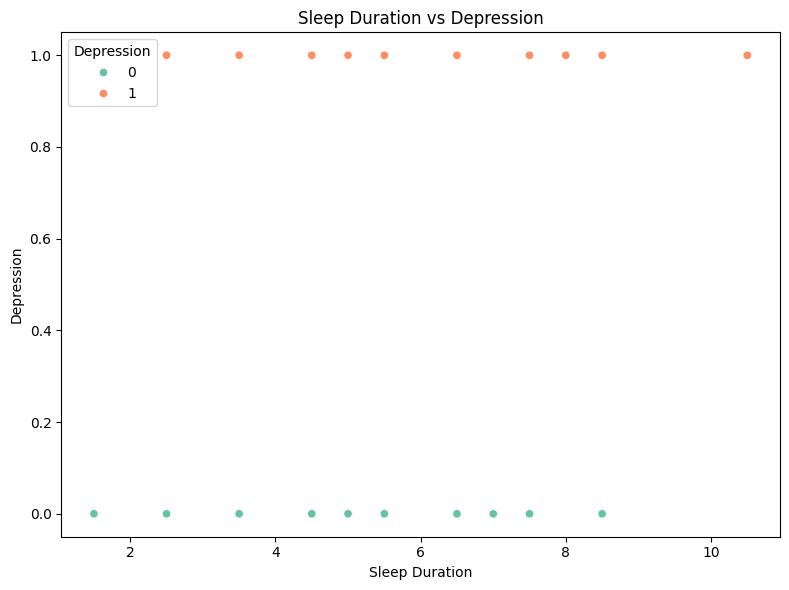

In [51]:


###################################
##### Sleep Duration Analysis #####
###################################

# Function to convert sleep duration to numerical values
def convert_sleep_duration(sleep_range):
    try:
        # Custom handling for specific phrases
        if sleep_range.lower() == "more than 8 hours":
            return 8.5
        elif sleep_range.lower() == "less than 5 hours":
            return 4.5
        elif sleep_range.lower() == "moderate":
            return 2.5

        # Extract numerical values from the string
        numbers = re.findall(r'\d+', sleep_range)
        if len(numbers) == 2:
            return (float(numbers[0]) + float(numbers[1])) / 2
        elif len(numbers) == 1:
            return float(numbers[0])
        else:
            raise ValueError("Unexpected sleep range format")
    except Exception as e:
        print(f"Error processing '{sleep_range}': {e}")
        return None

# Apply the function to the 'Sleep Duration' column
balanced_dataset_LE['Sleep Duration'] = balanced_dataset_LE['Sleep Duration'].apply(convert_sleep_duration)

balanced_dataset_LE = balanced_dataset_LE.dropna(subset=['Sleep Duration'])

balanced_dataset_LE =balanced_dataset_LE[balanced_dataset_LE['Sleep Duration'] <=20]
        
num_entries_more_than_14 =balanced_dataset_LE[balanced_dataset_LE['Sleep Duration'] > 14].shape[0]
print(num_entries_more_than_14)   
                                                            
print(balanced_dataset_LE.isnull().sum())
# Verify the changes
print("balanced_dataset_LE after converting sleep duration:")
print(balanced_dataset_LE[['Sleep Duration']].head())
print(balanced_dataset_LE['Sleep Duration'].unique())
print(balanced_dataset_LE['Sleep Duration'].isna().sum())
nan_or_empty_sleep_duration = balanced_dataset_LE[balanced_dataset_LE['Sleep Duration'].isna() | (balanced_dataset_LE['Sleep Duration'] == '')]
print(nan_or_empty_sleep_duration['Sleep Duration'])

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sleep Duration', y='Depression', data=balanced_dataset_LE, palette='Set2', hue='Depression')
plt.title('Sleep Duration vs Depression')
plt.xlabel('Sleep Duration')
plt.ylabel('Depression')
plt.tight_layout()
plt.savefig('../reports/figures/ash/Sleep_Duration_vs_Depression.png')
plt.show()


/var/folders/9k/7f2qrj2s2md1wcvqrgc5twcr0000gn/T/ipykernel_29349/1712533786.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sleep Duration', data=balanced_dataset_LE, palette='Set2')


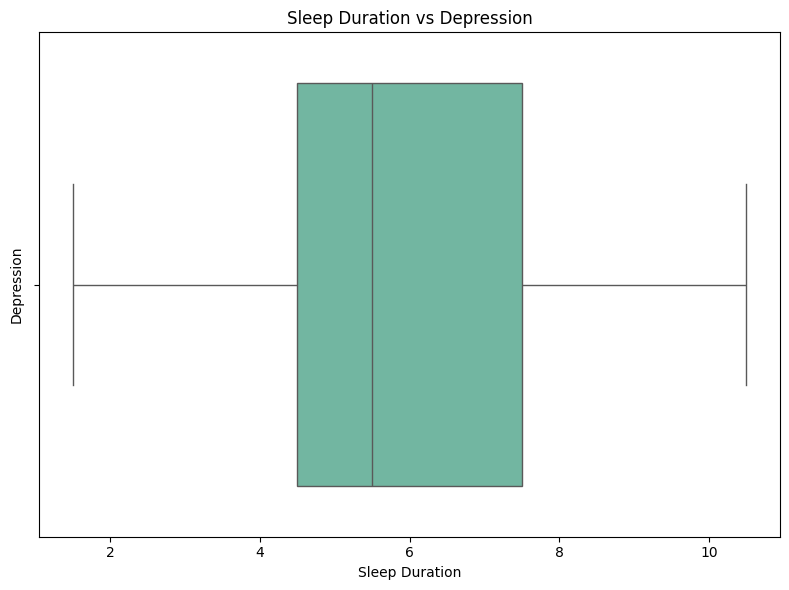

In [52]:


plt.figure(figsize=(8, 6))
sns.boxplot(x='Sleep Duration', data=balanced_dataset_LE, palette='Set2')
plt.title('Sleep Duration vs Depression')
plt.xlabel('Sleep Duration')
plt.ylabel('Depression')
plt.tight_layout()
plt.savefig('../reports/figures/ash/Sleep_Duration_vs_Depression_boxplot.png')
plt.show()

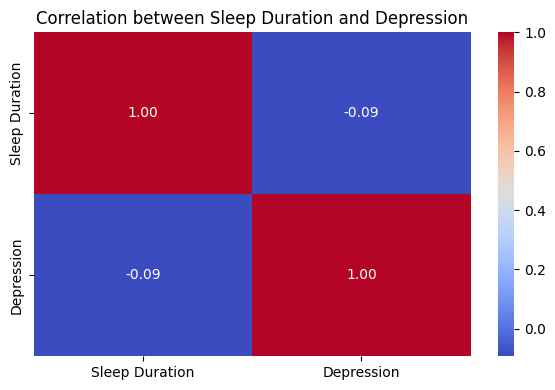

In [53]:



corr_matrix = balanced_dataset_LE[['Sleep Duration', 'Depression']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Sleep Duration and Depression')
plt.tight_layout()
plt.savefig('../reports/figures/ash/Sleep_Duration_Depression_Correlation.png')
# plt.show()

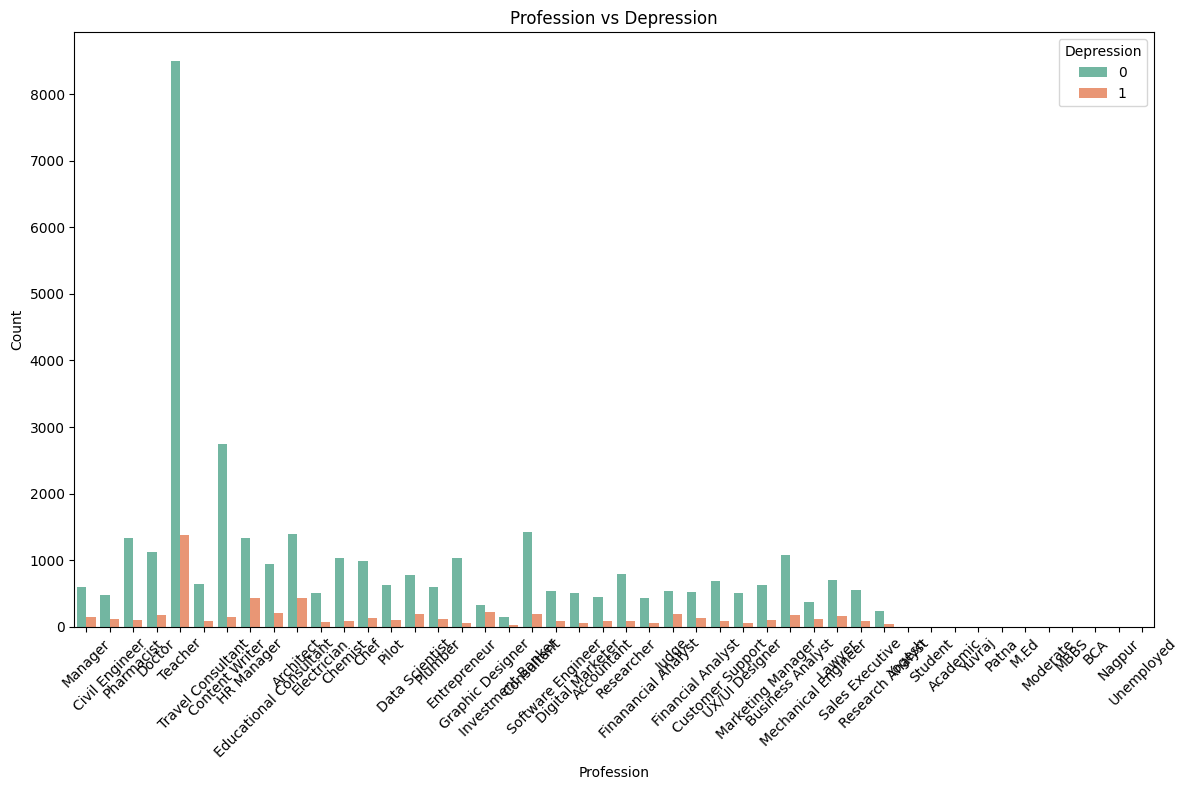

In [54]:



##################################################################################
# Create the plot


plt.figure(figsize=(12, 8))
sns.countplot(x='Profession', hue='Depression', data=balanced_dataset_LE, palette='Set2')
plt.title('Profession vs Depression')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Depression')
plt.tight_layout()
plt.show()


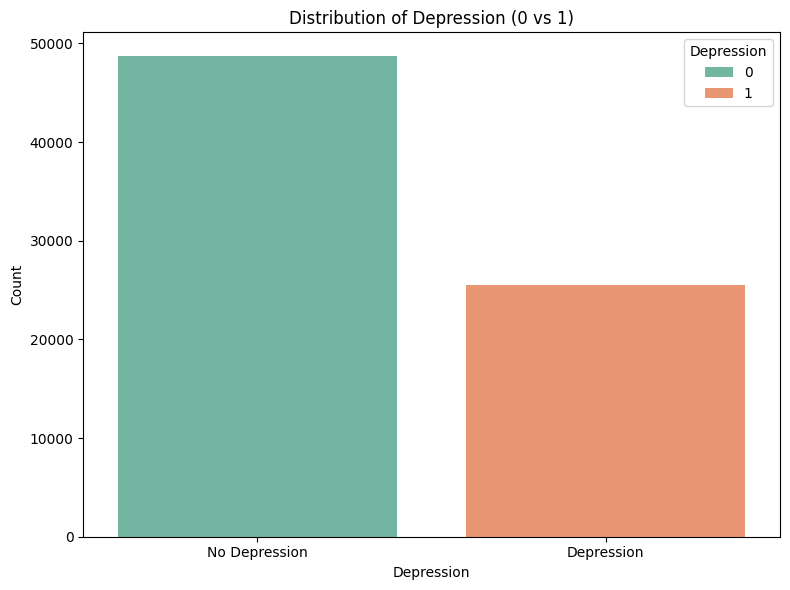

In [55]:

# Create the count plot for the Depression column
plt.figure(figsize=(8, 6))
sns.countplot(x='Depression', hue='Depression', data=balanced_dataset_LE, palette='Set2')
plt.title('Distribution of Depression (0 vs 1)')
plt.xlabel('Depression')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Depression', 'Depression'])
plt.tight_layout()
plt.savefig('../reports/figures/ash/depression.png')
plt.show()

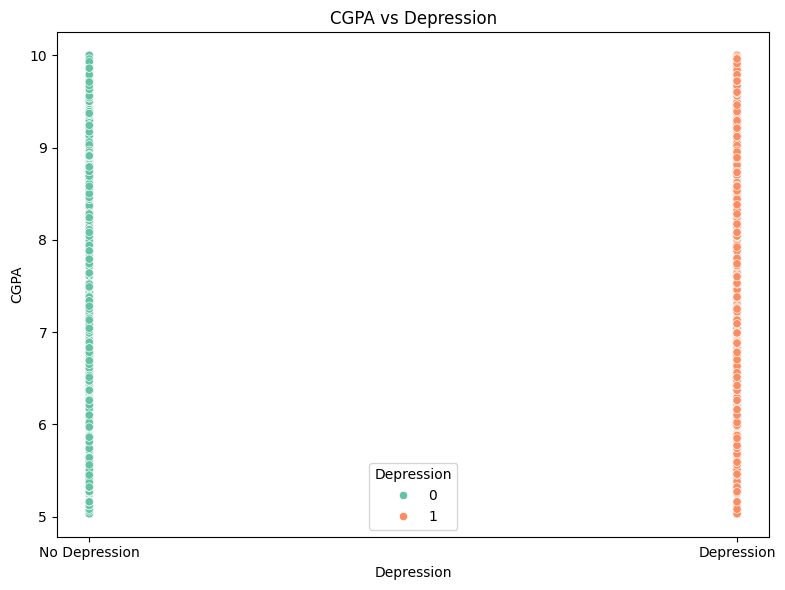

In [56]:



plt.figure(figsize=(8, 6))
sns.scatterplot(x='Depression', y='CGPA', hue='Depression', data=balanced_dataset_LE, palette='Set2')
plt.title('CGPA vs Depression')
plt.xlabel('Depression')
plt.ylabel('CGPA')
plt.xticks(ticks=[0, 1], labels=['No Depression', 'Depression'])
plt.tight_layout()
plt.savefig('../reports/figures/ash/CGPA_depression.png')
plt.show()

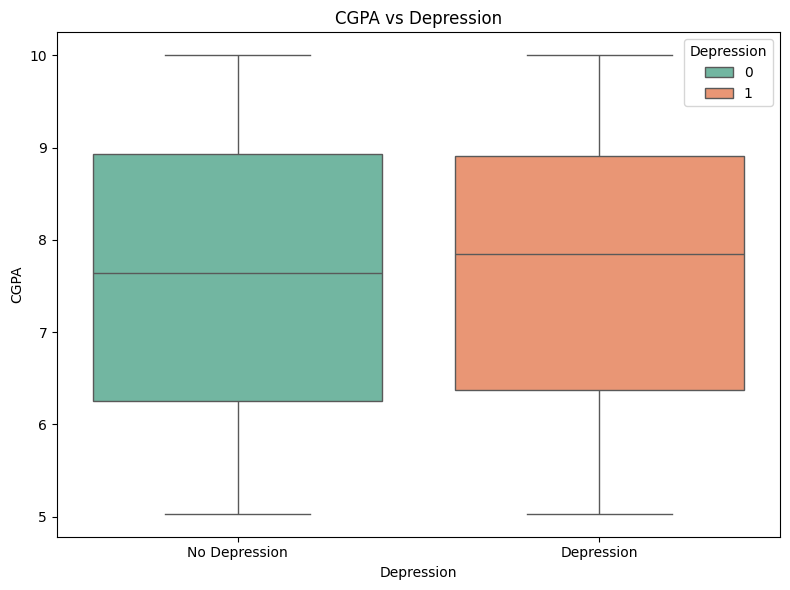

In [57]:



plt.figure(figsize=(8, 6))
sns.boxplot(x='Depression', y='CGPA', hue='Depression', data=balanced_dataset_LE, palette='Set2')
plt.title('CGPA vs Depression')
plt.xlabel('Depression')
plt.ylabel('CGPA')
plt.xticks(ticks=[0, 1], labels=['No Depression', 'Depression'])
plt.tight_layout()
plt.savefig('../reports/figures/ash/CGPAbox_depression.png')
plt.show()

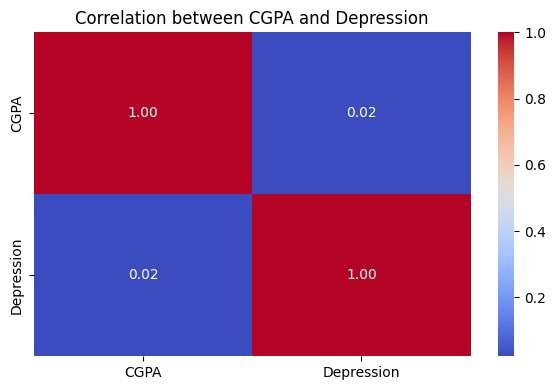

In [58]:



corr_matrix2 = balanced_dataset_LE[['CGPA', 'Depression']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between CGPA and Depression')
plt.tight_layout()
plt.savefig('../reports/figures/ash/CGPA_Depression_Correlation.png')
plt.show()


Dietary Habits
Unhealthy            26057
Moderate             25958
Healthy              22225
More Healthy             1
Less than Healthy        1
Less Healthy             1
No Healthy               1
Name: count, dtype: int64
Dietary_Habits_Encoded
3.0    26060
1.0    25958
2.0    22226
Name: count, dtype: int64
           id      Name  Gender   Age       City           Profession  CGPA  \
0       74762  Shivansh    Male  43.0     Kanpur              Manager   NaN   
1      126702     Vidya  Female  59.0     Mumbai       Civil Engineer   NaN   
2       62525    Simran  Female  23.0   Srinagar           Pharmacist   NaN   
3       97172    Tanmay    Male  35.0       Agra       Civil Engineer   NaN   
4       83259    Aarush    Male  19.0   Ludhiana                  NaN  5.16   
...       ...       ...     ...   ...        ...                  ...   ...   
74259     274    Prisha  Female  20.0      Thane                  NaN  6.99   
74260   82785    Pranav    Male  32.0  Ahmedabad  

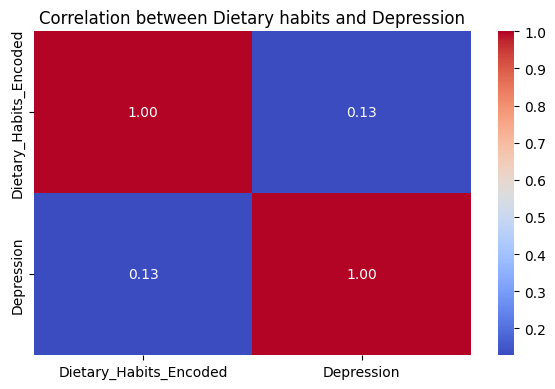

In [59]:


###################################
##### Dietary Habits Analysis #####
###################################

def encode_dietary_habits(value):
    mapping = {
        'Moderate': 1,
        'Healthy': 2,
        'More Healthy': 2,
        'Unhealthy': 3,
        'Less Healthy': 3,
        'No Healthy': 3,
        'Less than Healthy': 3  # Combine both into the 'Less Healthy' category
    }
    return mapping.get(value, np.nan)  # Return NaN for irrelevant entries

# Apply the encoding function to the 'Dietary Habits' column
balanced_dataset_LE['Dietary_Habits_Encoded'] = balanced_dataset_LE['Dietary Habits'].apply(encode_dietary_habits)

balanced_dataset_LE = balanced_dataset_LE.dropna(subset=['Dietary_Habits_Encoded'])

print(balanced_dataset_LE['Dietary Habits'].value_counts(dropna=False))

print(balanced_dataset_LE['Dietary_Habits_Encoded'].value_counts(dropna=False))

balanced_dataset_LE = balanced_dataset_LE.drop(columns=['Dietary Habits'])
print(balanced_dataset_LE)

corr_matrix3 = balanced_dataset_LE[['Dietary_Habits_Encoded', 'Depression']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix3, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Dietary habits and Depression')
plt.tight_layout()
plt.savefig('../reports/figures/ash/Dietary_habits_Depression_Correlation.png')
plt.show()

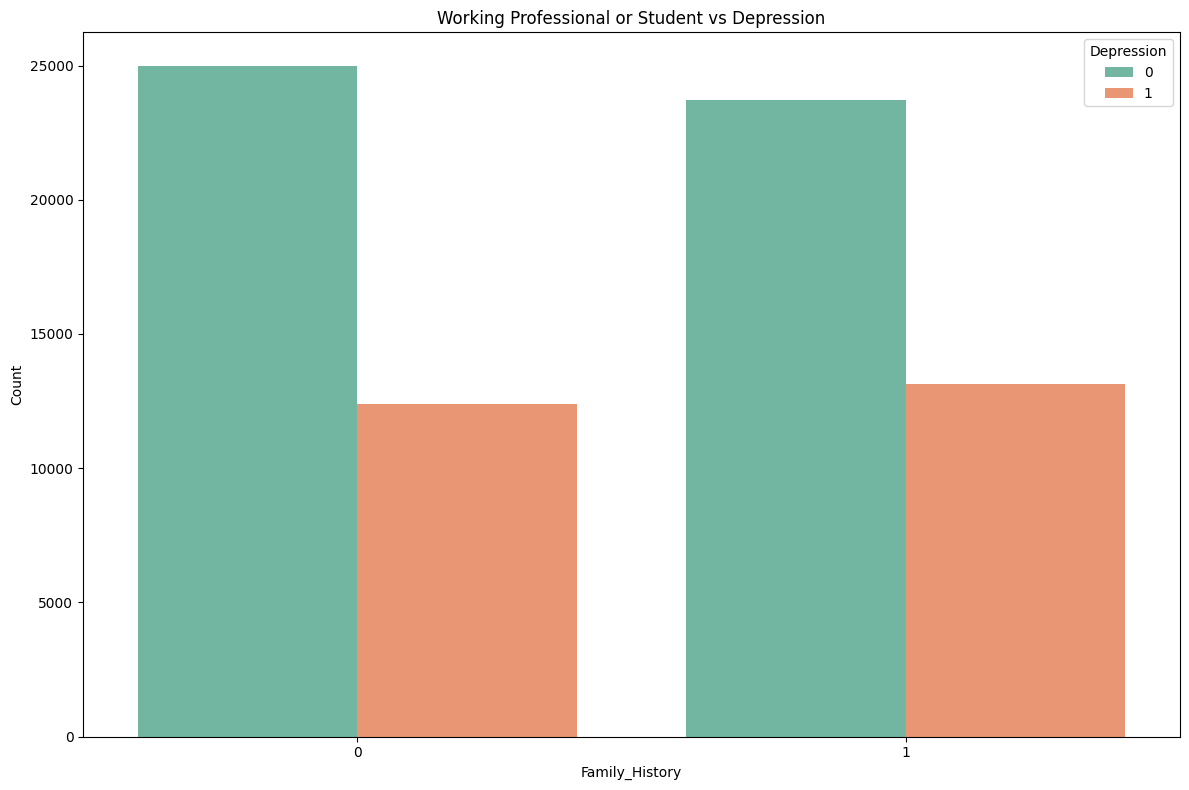

In [60]:






#############################################
########## Family History Analysis ##########
#############################################

label_encoder = LabelEncoder()

balanced_dataset_LE['Family_History_LE'] = label_encoder.fit_transform(balanced_dataset_LE['Family History of Mental Illness'])

balanced_dataset_LE = balanced_dataset_LE.drop(columns=['Family History of Mental Illness'])

balanced_dataset_LE.to_csv('../data/processed/balanced_dataset_LE.csv', index=False)

plt.figure(figsize=(12, 8))
sns.countplot(x='Family_History_LE', hue='Depression', data=balanced_dataset_LE, palette='Set2')
plt.title('Working Professional or Student vs Depression')
plt.xlabel('Family_History')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Depression')
plt.tight_layout()
plt.savefig('../reports/figures/ash/Family_History.png')
plt.show()

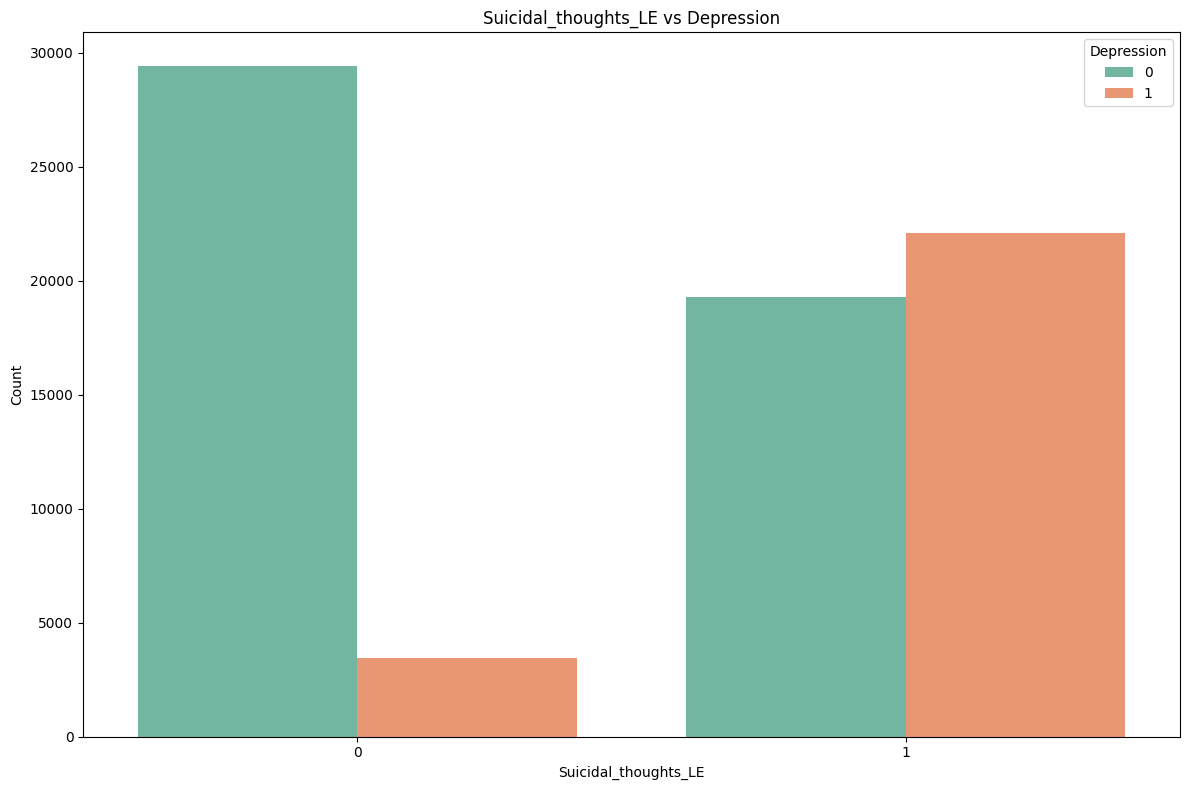

In [61]:



###############################################
########## Sucidal Thoughts Analysis ##########
###############################################

label_encoder = LabelEncoder()

balanced_dataset_LE['Suicidal_thoughts_LE'] = label_encoder.fit_transform(balanced_dataset_LE['Have you ever had suicidal thoughts ?'])

balanced_dataset_LE = balanced_dataset_LE.drop(columns=['Have you ever had suicidal thoughts ?'])

balanced_dataset_LE.to_csv('../data/processed/balanced_dataset_LE.csv', index=False)

plt.figure(figsize=(12, 8))
sns.countplot(x='Suicidal_thoughts_LE', hue='Depression', data=balanced_dataset_LE, palette='Set2')
plt.title('Suicidal_thoughts_LE vs Depression')
plt.xlabel('Suicidal_thoughts_LE')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Depression')
plt.tight_layout()
plt.savefig('../reports/figures/ash/Suicidal_thoughts_LE.png')
plt.show()

Unique cleaned degrees:
['BHM' 'B.Tech' 'MBBS' 'Class 12' 'BA' 'M.Pharm' 'B.Pharm' 'B.Ed' 'MHM'
 'MCA' 'M.Tech' 'M.Ed' 'MA' 'B.Arch' 'B.Com' 'BCA' 'MD' 'LLM' 'MSc' 'BE'
 'BBA' 'M.Com' 'ME' 'PhD' 'LLB' 'MBA' 'Class 11' 'M.S']
Degree_LE
11    11285
2      5661
0      4366
1      4107
7      3210
3      2798
22     2685
15     2679
26     2614
4      2493
6      2422
9      2341
18     2329
12     2194
13     2107
16     2045
5      1835
20     1826
14     1678
23     1659
8      1647
21     1613
27     1555
24     1541
19     1533
25     1386
10        1
17        1
Name: count, dtype: int64


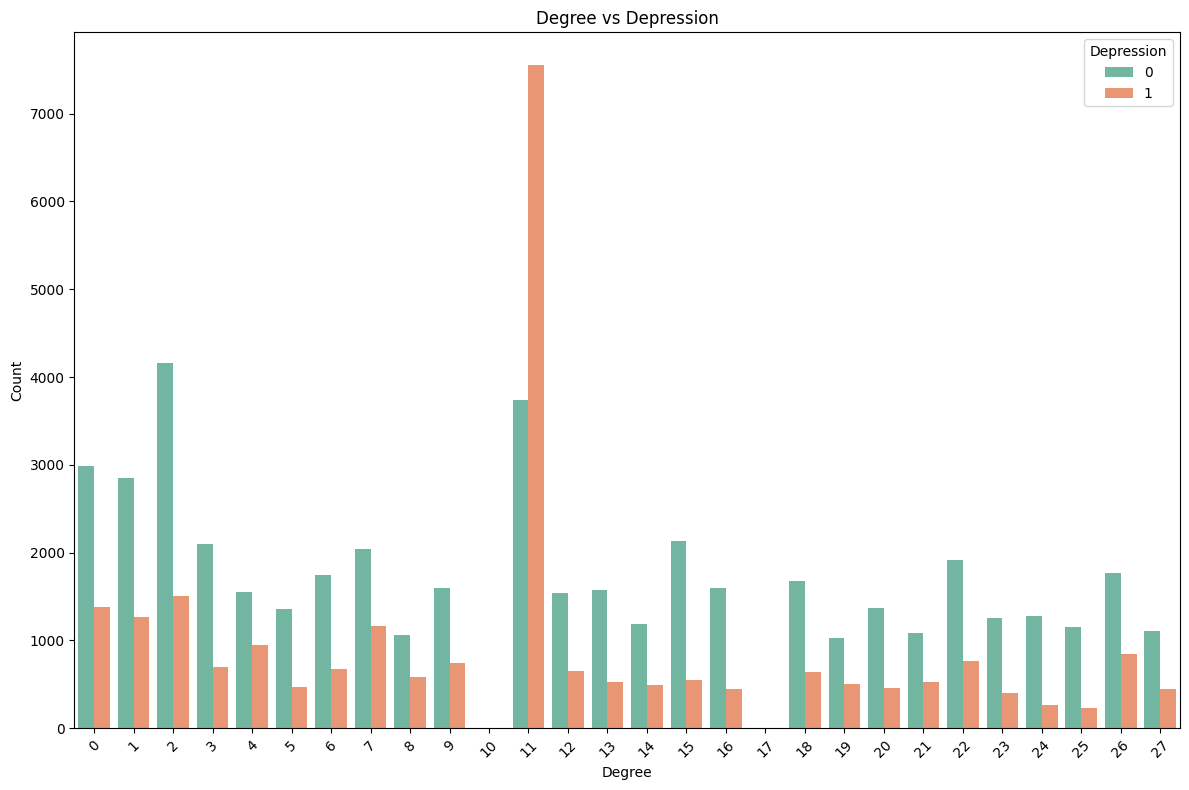

In [62]:



###############################################
################## Degree #####################
###############################################
 

# Load the dataset
balanced_dataset_LE = pd.read_csv('../data/processed/balanced_dataset_LE.csv')

# List of valid degrees (this list should be extended based on your dataset's context)
valid_degrees = ['BHM', 'B.Tech', 'MBBS', 'Class 12', 'Class 11', 'BA', 'M.Pharm', 'B.Pharm', 'B.Ed', 'MHM',
                 'MCA', 'M.Tech', 'BSc', 'M.Ed', 'MA', 'B.Arch', 'B.Com', 'BCA', 'MD', 'LLM', 'MSc',
                 'BE', 'BBA', 'M.Com', 'ME', 'PhD', 'LLB', 'MBA', 'M.S']

# Standardize similar entries
standardization_map = {
    'BArch': 'B.Arch',
    'BSc': 'B.Sc',
    'MPharm': 'M.Pharm',
    'BPharm': 'B.Pharm',
    'N.Pharm':'M.Pharm',
    'MTech': 'M.Tech',
    'BEd': 'B.Ed'
    # Add more standardizations as needed
}

# Apply standardization
balanced_dataset_LE['Degree_Standardized'] = balanced_dataset_LE['Degree'].replace(standardization_map)

# Filter valid entries and replace invalid ones with NaN
balanced_dataset_LE['Degree_Cleaned'] = balanced_dataset_LE['Degree_Standardized'].apply(lambda x: x if x in valid_degrees else np.nan)

# Drop rows with NaN values in the cleaned degree column (optional)
balanced_dataset_LE = balanced_dataset_LE.dropna(subset=['Degree_Cleaned'])

print("Unique cleaned degrees:")
print(balanced_dataset_LE['Degree_Cleaned'].unique())


label_encoder = LabelEncoder()

balanced_dataset_LE['Degree_LE'] = label_encoder.fit_transform(balanced_dataset_LE['Degree_Cleaned'])

balanced_dataset_LE = balanced_dataset_LE.drop(columns=['Degree_Cleaned', 'Degree', 'Degree_Standardized'])

balanced_dataset_LE.to_csv('../data/processed/balanced_dataset_LE.csv', index=False)


print(balanced_dataset_LE['Degree_LE'].value_counts())
plt.figure(figsize=(12, 8))
sns.countplot(x='Degree_LE', hue='Depression', data=balanced_dataset_LE, palette='Set2')
plt.title('Degree vs Depression')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Depression')
plt.tight_layout()
plt.savefig('../reports/figures/ash/Degree.png')
plt.show()

City
Kalyan         3393
Vasai-Virar    3031
Ahmedabad      2908
Patna          2838
Kolkata        2810
               ... 
Rashi             1
Khaziabad         1
3.0               1
Harsh             1
Mira              1
Name: count, Length: 64, dtype: int64
City
Kalyan         3393
Vasai-Virar    3031
Ahmedabad      2908
Patna          2838
Kolkata        2810
               ... 
Rashi             1
Khaziabad         1
3.0               1
Harsh             1
Mira              1
Name: count, Length: 64, dtype: int64


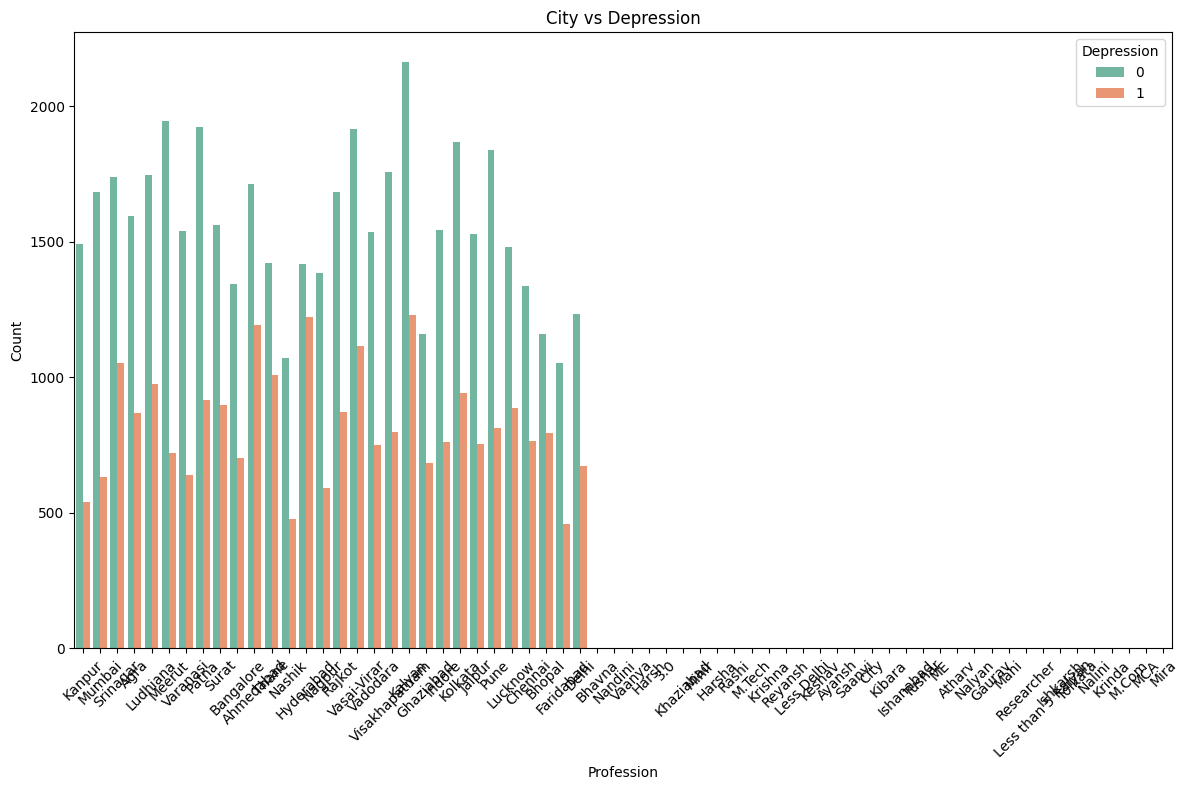

In [63]:



print(balanced_dataset_LE['City'].value_counts(dropna=False))
print(balanced_dataset_LE['City'].value_counts(dropna=False))

plt.figure(figsize=(12, 8))
sns.countplot(x='City', hue='Depression', data=balanced_dataset_LE, palette='Set2')
plt.title('City vs Depression')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Depression')
plt.tight_layout()
# plt.show()




Index(['id', 'Name', 'Gender', 'Age', 'City', 'Profession', 'CGPA',
       'Sleep Duration', 'Work/Study Hours', 'Financial Stress', 'Depression',
       'Working_Professional_Student_LE', 'Job_study_satisfaction',
       'Academic_Work_Pressure', 'Dietary_Habits_Encoded', 'Family_History_LE',
       'Suicidal_thoughts_LE', 'Degree_LE'],
      dtype='object')
0          Male
1        Female
2        Female
3          Male
4          Male
          ...  
74239    Female
74240      Male
74241    Female
74242      Male
74243      Male
Name: Gender, Length: 71611, dtype: object
(71611, 18)


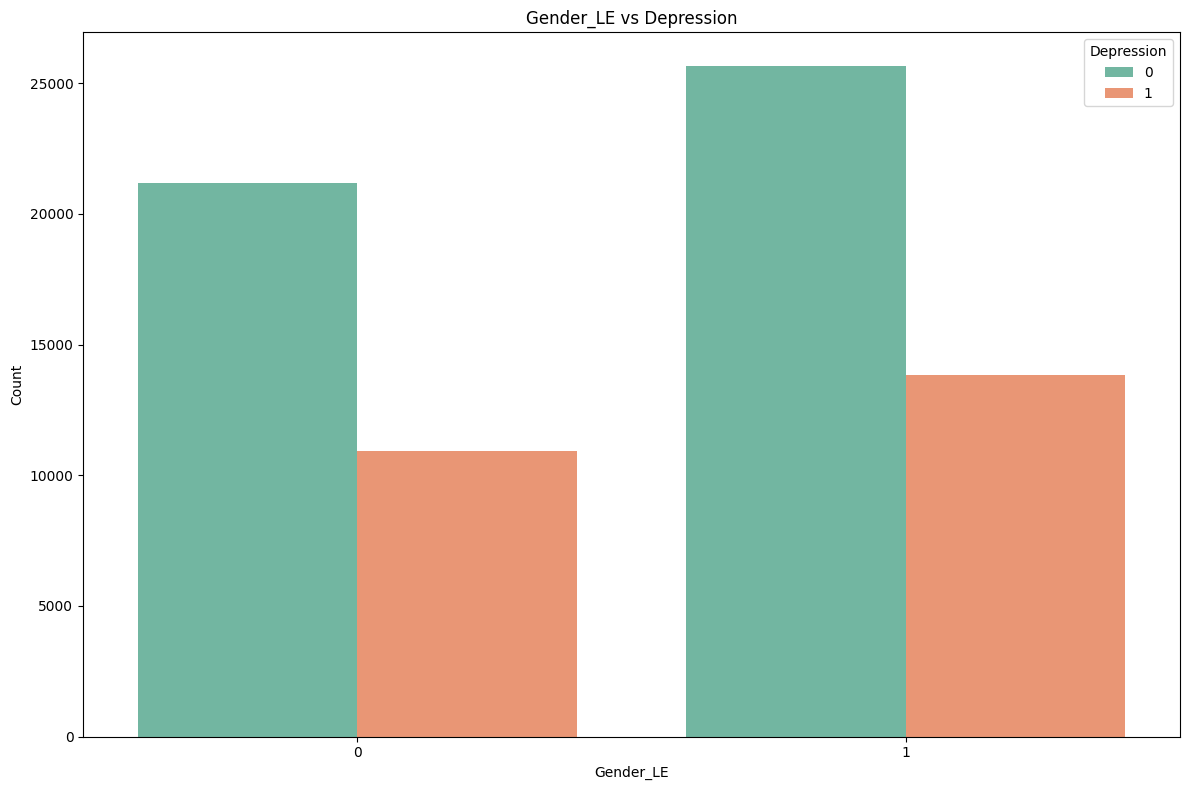

In [64]:





###############################################
############## Gender Analysis ################
###############################################

label_encoder = LabelEncoder()

print(balanced_dataset_LE.columns)


print(balanced_dataset_LE['Gender'])
balanced_dataset_LE['Gender_LE'] = label_encoder.fit_transform(balanced_dataset_LE['Gender'])

balanced_dataset_LE = balanced_dataset_LE.drop(columns=['Gender'])
print(balanced_dataset_LE.shape)
balanced_dataset_LE.to_csv('../data/processed/balanced_dataset_LE.csv', index=False)

plt.figure(figsize=(12, 8))
sns.countplot(x='Gender_LE', hue='Depression', data=balanced_dataset_LE, palette='Set2')
plt.title('Gender_LE vs Depression')
plt.xlabel('Gender_LE')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Depression')
plt.tight_layout()
plt.savefig('../reports/figures/ash/Gender_LE.png')
plt.show()


Cities (71611, 18)
Unique cleaned cities:
['Kanpur' 'Mumbai' 'Srinagar' 'Agra' 'Ludhiana' 'Meerut' 'Varanasi'
 'Patna' 'Surat' 'Bangalore' 'Ahmedabad' 'Thane' 'Nashik' 'Hyderabad'
 'Nagpur' 'Rajkot' 'Vasai-Virar' 'Vadodara' 'Visakhapatnam' 'Kalyan'
 'Ghaziabad' 'Indore' 'Kolkata' 'Jaipur' 'Pune' 'Lucknow' 'Chennai'
 'Bhopal' 'Faridabad' 'Delhi']
Cities2 (71568, 19)
City_LE
11    3393
28    3031
1     2908
20    2838
13    2810
23    2792
15    2722
16    2666
21    2652
8     2640
29    2556
22    2553
0     2461
24    2457
25    2430
14    2370
17    2316
9     2307
26    2287
10    2284
27    2177
4     2101
2     2044
12    2031
18    1976
3     1954
5     1908
7     1843
19    1551
6     1510
Name: count, dtype: int64


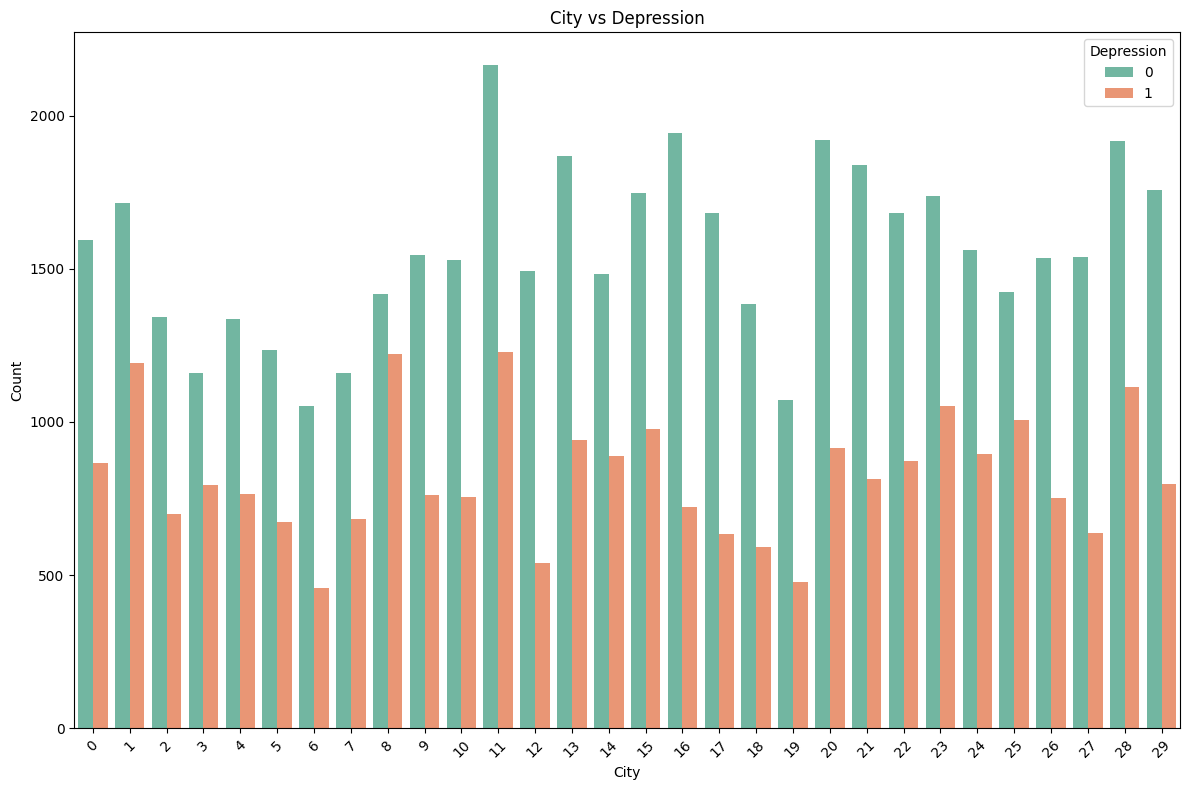

In [65]:



######################################################
################## City Analysis #####################
######################################################

# Load the dataset
balanced_dataset_LE = pd.read_csv('../data/processed/balanced_dataset_LE.csv')

# List of valid cities (this list should be extended based on your dataset's context)
valid_cities = ['Kanpur', 'Mumbai', 'Srinagar', 'Agra', 'Ludhiana', 'Meerut', 'Varanasi', 'Patna', 
                'Surat', 'Bangalore', 'Ahmedabad', 'Thane', 'Nashik', 'Hyderabad', 'Nagpur', 'Rajkot', 
                'Vasai-Virar', 'Vadodara', 'Visakhapatnam', 'Kalyan', 'Ghaziabad', 'Indore', 'Kolkata', 
                'Jaipur', 'Pune', 'Lucknow', 'Chennai', 'Bhopal', 'Faridabad', 'Delhi']

print("Cities", balanced_dataset_LE.shape)

# Filter valid entries and replace invalid ones with NaN
balanced_dataset_LE['City_Cleaned'] = balanced_dataset_LE['City'].apply(lambda x: x if x in valid_cities else np.nan)

# Drop rows with NaN values in the cleaned degree column (optional)
balanced_dataset_LE = balanced_dataset_LE.dropna(subset=['City_Cleaned'])

print("Unique cleaned cities:")
print(balanced_dataset_LE['City_Cleaned'].unique())

print("Cities2", balanced_dataset_LE.shape)

label_encoder = LabelEncoder()

balanced_dataset_LE['City_LE'] = label_encoder.fit_transform(balanced_dataset_LE['City_Cleaned'])

balanced_dataset_LE = balanced_dataset_LE.drop(columns=['City_Cleaned', 'City'])

balanced_dataset_LE.to_csv('../data/processed/balanced_dataset_LE.csv', index=False)


print(balanced_dataset_LE['City_LE'].value_counts())

plt.figure(figsize=(12, 8))
sns.countplot(x='City_LE', hue='Depression', data=balanced_dataset_LE, palette='Set2')
plt.title('City vs Depression')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Depression')
plt.tight_layout()
plt.savefig('../reports/figures/ash/City_vs_Depression.png')
plt.show()

Unique cleaned Professions:
['Manager' 'Civil Engineer' 'Pharmacist' 'Doctor' 'Teacher'
 'Travel Consultant' 'Content Writer' 'HR Manager'
 'Educational Consultant' 'Architect' 'Electrician' 'Chemist' 'Chef'
 'Pilot' 'Data Scientist' 'Plumber' 'Entrepreneur' 'Investment Banker'
 'Software Engineer' 'Digital Marketer' 'Accountant' 'Researcher' 'Judge'
 'Graphic Designer' 'Financial Analyst' 'Customer Support'
 'UX/UI Designer' 'Marketing Manager' 'Consultant' 'Business Analyst'
 'Mechanical Engineer' 'Lawyer' 'Sales Executive' 'Research Analyst'
 'Unemployed']


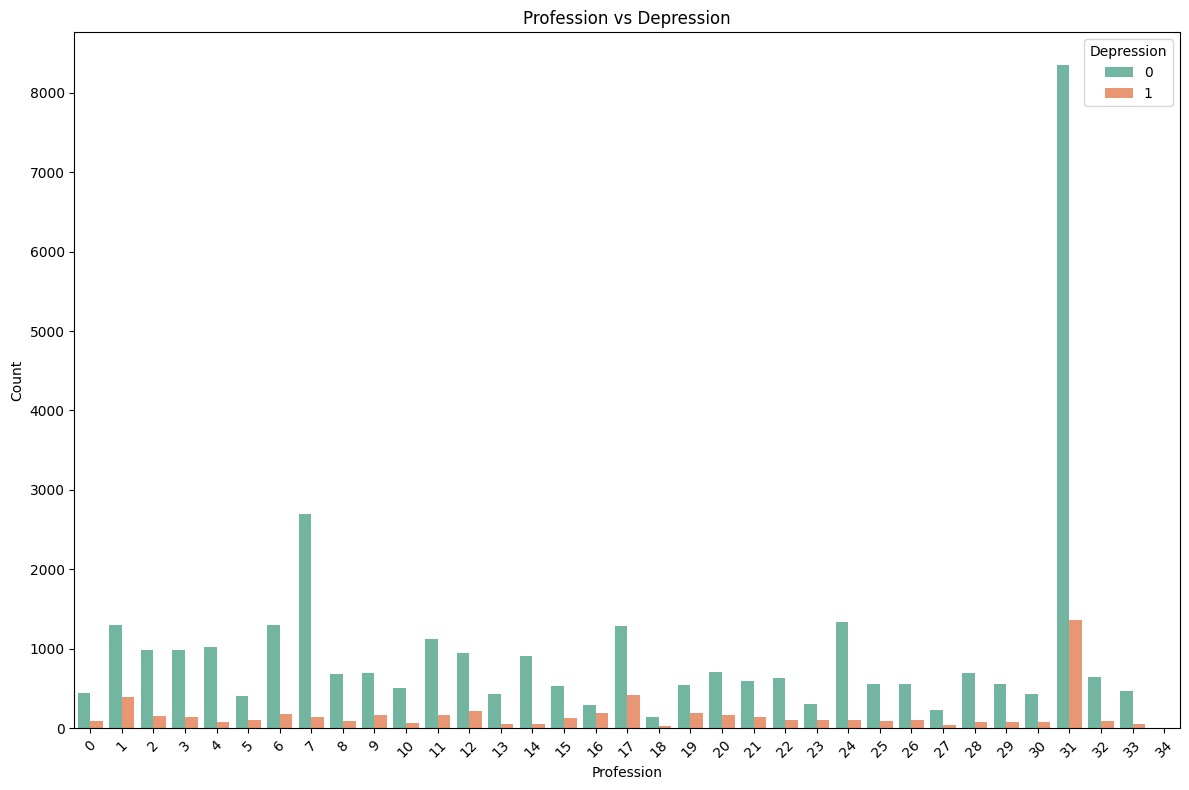

In [66]:



############################################################
################## Profession Analysis #####################
############################################################
 
# Load the dataset
balanced_dataset_LE = pd.read_csv('../data/processed/balanced_dataset_LE.csv')

#List of valid professions
valid_professions = [
    'Manager', 'Civil Engineer', 'Pharmacist', 'Doctor', 'Teacher', 'Travel Consultant', 'Content Writer', 
    'HR Manager', 'Educational Consultant', 'Architect', 'Electrician', 'Chemist', 'Chef', 'Pilot', 
    'Data Scientist', 'Plumber', 'Entrepreneur', 'Investment Banker', 'Software Engineer', 
    'Digital Marketer', 'Accountant', 'Researcher', 'Financial Analyst', 'Judge', 'Graphic Designer', 
    'Customer Support', 'UX/UI Designer', 'Marketing Manager', 'Consultant', 'Business Analyst', 
    'Mechanical Engineer', 'Lawyer', 'Sales Executive', 'Research Analyst', 'Unemployed'
]

# Filter valid entries and replace invalid ones with NaN
balanced_dataset_LE['Profession_Cleaned'] = balanced_dataset_LE['Profession'].apply(lambda x: x if x in valid_professions else np.nan)

# Drop rows with NaN values in the cleaned degree column (optional)
balanced_dataset_LE = balanced_dataset_LE.dropna(subset=['Profession_Cleaned'])

print("Unique cleaned Professions:")
print(balanced_dataset_LE['Profession_Cleaned'].unique())

label_encoder = LabelEncoder()

balanced_dataset_LE['Profession_LE'] = label_encoder.fit_transform(balanced_dataset_LE['Profession_Cleaned'])

balanced_dataset_LE = balanced_dataset_LE.drop(columns=['Profession_Cleaned', 'Profession'])

balanced_dataset_LE.to_csv('../data/processed/balanced_dataset_LE.csv', index=False)


plt.figure(figsize=(12, 8))
sns.countplot(x='Profession_LE', hue='Depression', data=balanced_dataset_LE, palette='Set2')
plt.title('Profession vs Depression')
plt.xlabel('Profession')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Depression')
plt.tight_layout()
plt.savefig('../reports/figures/ash/Profession_vs_depression.png')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap of All Features')

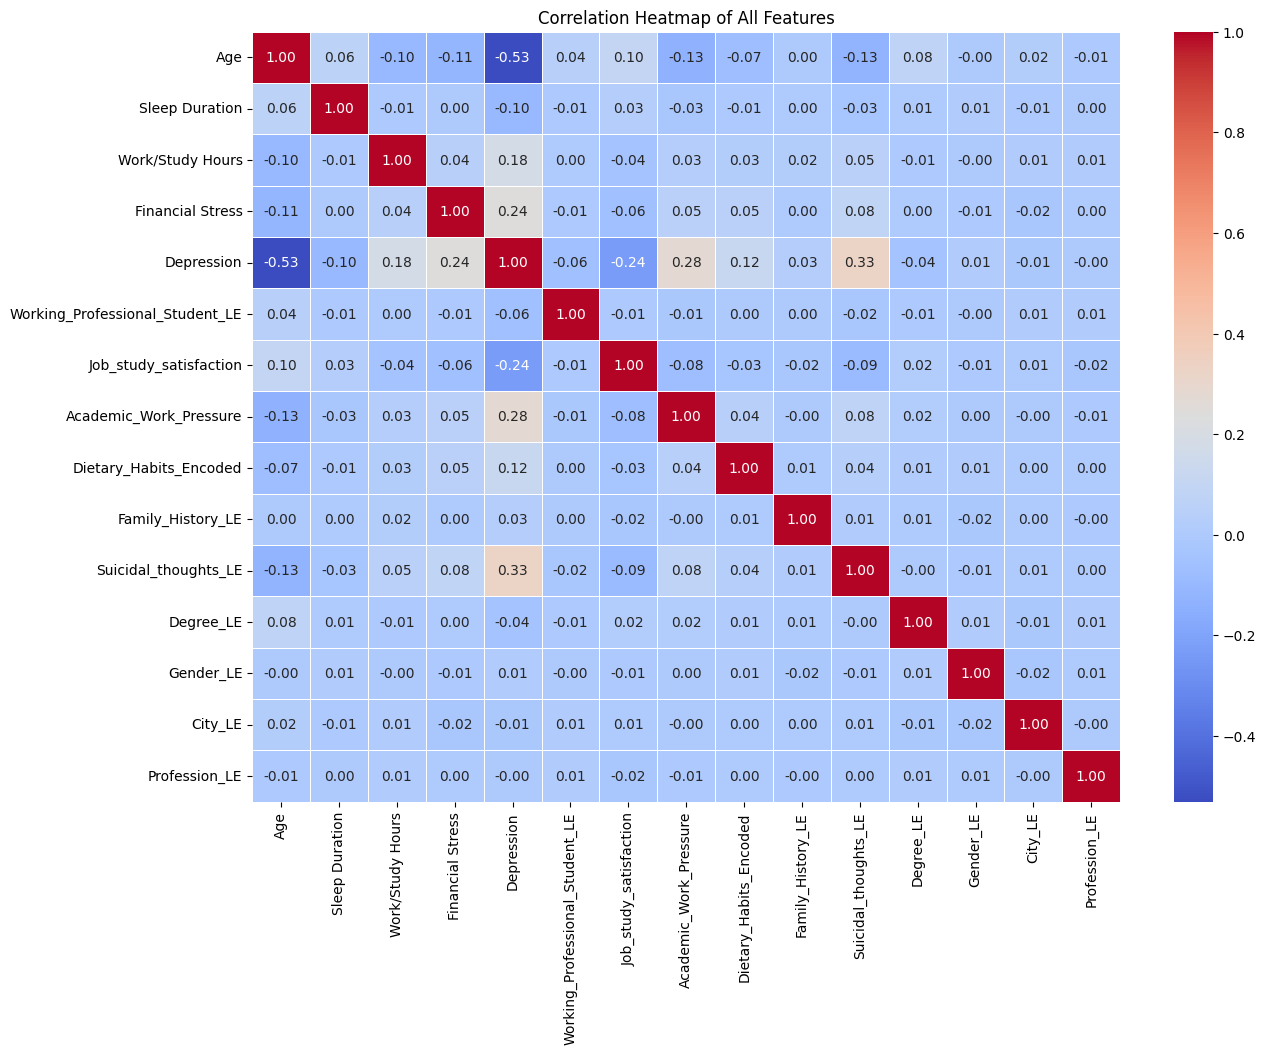

In [67]:




#########################################################
################ Cleaned Dataset for ML #################
#########################################################

balanced_dataset_LE = balanced_dataset_LE.drop(columns=['id', 'Name', 'CGPA'])

balanced_dataset_LE.to_csv('../data/processed/cleaned_dataset_for_ML.csv', index=False)

final_cleaned_data = pd.read_csv('../data/processed/cleaned_dataset_for_ML.csv')

# Calculate the correlation matrix
corr_matrix = final_cleaned_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, linewidths=0.5)

# Title for the heatmap
plt.title('Correlation Heatmap of All Features')

# Display the heatmap
# plt.show()
